In [1]:
import pandas as pd

In [55]:
listing_data=pd.read_csv('C:\\Users\\miche\\Documents\\Springboard\\Project\\Airbnb\\Data\\listings.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,10988680,https://www.airbnb.com/rooms/10988680,20170401232214,2017-04-02,"Simple, new, clean accommodation",I signed a new lease and moving out of my plac...,"This is clean, simple, affordable accommodatio...",I signed a new lease and moving out of my plac...,none,Place is very conveniently located in the Miss...,...,10.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.07
1,8053481,https://www.airbnb.com/rooms/8053481,20170401232214,2017-04-02,Spacious 2BR/2BATH w/Shared Kitchen,Enjoy the whole main floor of our sunny 2-leve...,"We love our big, bright home and we know you w...",Enjoy the whole main floor of our sunny 2-leve...,none,Our Mission District neighborhood is among the...,...,9.0,f,NaN,SAN FRANCISCO,f,strict,f,f,1,0.49
2,14011173,https://www.airbnb.com/rooms/14011173,20170401232214,2017-04-02,Private room - Victorian House in the Mission,Awesome location in the Mission District of SF...,NaN,Awesome location in the Mission District of SF...,none,NaN,...,9.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,3,0.27
3,16142131,https://www.airbnb.com/rooms/16142131,20170401232214,2017-04-02,Spacious 1BR in the Mission District,"Quiet 1 bedroom apartment, with a spacious, we...",NaN,"Quiet 1 bedroom apartment, with a spacious, we...",none,NaN,...,8.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.48
4,9080622,https://www.airbnb.com/rooms/9080622,20170401232214,2017-04-02,Edwardian flat in heart of Mission,Bedroom with queen bed available. The condo i...,NaN,Bedroom with queen bed available. The condo i...,none,NaN,...,NaN,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,NaN


In [40]:
listing_data.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
8701,2204233,https://www.airbnb.com/rooms/2204233,20170401232214,2017-04-02,Quaint Mission Penthouse Suite,"Three attractive roommates, hard wood floors, ...",NaN,"Three attractive roommates, hard wood floors, ...",none,NaN,...,10.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,1,0.18
8702,13863748,https://www.airbnb.com/rooms/13863748,20170401232214,2017-04-02,COLORFUL Sunny Mission Home,"My place is close to Beretta, Trick Dog, Atlas...",NaN,"My place is close to Beretta, Trick Dog, Atlas...",none,NaN,...,10.0,f,NaN,SAN FRANCISCO,f,flexible,f,f,2,0.24
8703,8702764,https://www.airbnb.com/rooms/8702764,20170401232214,2017-04-02,Heavenly loft in Mission,Beautiful white attic loft. Large window peers...,NaN,Beautiful white attic loft. Large window peers...,none,NaN,...,9.0,f,NaN,SAN FRANCISCO,t,moderate,f,f,4,5.30
8704,6272816,https://www.airbnb.com/rooms/6272816,20170401232214,2017-04-02,"Sunny, Private Room / Valencia St",The sunlight pours into the tall bay windows i...,The sunlight pours into the tall bay windows i...,The sunlight pours into the tall bay windows i...,none,We live off of Valencia St - famous for it's f...,...,9.0,f,STR-0000416,SAN FRANCISCO,f,moderate,f,f,1,3.67
8705,17998286,https://www.airbnb.com/rooms/17998286,20170401232214,2017-04-02,Massive sun-filled room next to Dolores Park,Giant victorian home in the heart of the missi...,NaN,Giant victorian home in the heart of the missi...,none,NaN,...,NaN,f,NaN,SAN FRANCISCO,t,flexible,f,f,1,NaN


In [4]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
listing_data.shape

(8706, 95)

In [6]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 95 columns):
id                                  8706 non-null int64
listing_url                         8706 non-null object
scrape_id                           8706 non-null int64
last_scraped                        8706 non-null object
name                                8706 non-null object
summary                             8435 non-null object
space                               6224 non-null object
description                         8704 non-null object
experiences_offered                 8706 non-null object
neighborhood_overview               5188 non-null object
notes                               4139 non-null object
transit                             5452 non-null object
access                              5351 non-null object
interaction                         5132 non-null object
house_rules                         5860 non-null object
thumbnail_url                       7230

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
print(listing_data['price'])

0          $49.00
1         $220.00
2         $100.00
3         $117.00
4         $200.00
5         $162.00
6         $230.00
7         $173.00
8         $600.00
9         $250.00
10        $300.00
11        $189.00
12        $130.00
13         $90.00
14         $95.00
15        $325.00
16        $119.00
17        $134.00
18        $490.00
19        $140.00
20        $185.00
21        $550.00
22        $113.00
23        $115.00
24        $155.00
25         $45.00
26        $169.00
27        $186.00
28         $77.00
29        $250.00
          ...    
8676      $170.00
8677      $170.00
8678    $1,500.00
8679      $450.00
8680      $210.00
8681       $80.00
8682       $75.00
8683      $130.00
8684      $114.00
8685      $149.00
8686      $115.00
8687      $109.00
8688       $87.00
8689      $300.00
8690      $250.00
8691      $250.00
8692      $245.00
8693      $179.00
8694      $150.00
8695      $120.00
8696      $100.00
8697       $60.00
8698      $140.00
8699      $295.00
8700      

In [13]:
import re

In [56]:
listing_data['price']=listing_data.price.apply(lambda x: x.replace('$',''))

In [57]:
listing_data['price']=listing_data.price.apply(lambda x: x.replace(',',''))

In [58]:
print(listing_data['price'])

0         49.00
1        220.00
2        100.00
3        117.00
4        200.00
5        162.00
6        230.00
7        173.00
8        600.00
9        250.00
10       300.00
11       189.00
12       130.00
13        90.00
14        95.00
15       325.00
16       119.00
17       134.00
18       490.00
19       140.00
20       185.00
21       550.00
22       113.00
23       115.00
24       155.00
25        45.00
26       169.00
27       186.00
28        77.00
29       250.00
         ...   
8676     170.00
8677     170.00
8678    1500.00
8679     450.00
8680     210.00
8681      80.00
8682      75.00
8683     130.00
8684     114.00
8685     149.00
8686     115.00
8687     109.00
8688      87.00
8689     300.00
8690     250.00
8691     250.00
8692     245.00
8693     179.00
8694     150.00
8695     120.00
8696     100.00
8697      60.00
8698     140.00
8699     295.00
8700     285.00
8701      75.00
8702     250.00
8703     120.00
8704     125.00
8705     100.00
Name: price, Length: 870

In [59]:
listing_data['price']=pd.to_numeric(listing_data['price'])

In [60]:
print(listing_data['price'])

0         49.0
1        220.0
2        100.0
3        117.0
4        200.0
5        162.0
6        230.0
7        173.0
8        600.0
9        250.0
10       300.0
11       189.0
12       130.0
13        90.0
14        95.0
15       325.0
16       119.0
17       134.0
18       490.0
19       140.0
20       185.0
21       550.0
22       113.0
23       115.0
24       155.0
25        45.0
26       169.0
27       186.0
28        77.0
29       250.0
         ...  
8676     170.0
8677     170.0
8678    1500.0
8679     450.0
8680     210.0
8681      80.0
8682      75.0
8683     130.0
8684     114.0
8685     149.0
8686     115.0
8687     109.0
8688      87.0
8689     300.0
8690     250.0
8691     250.0
8692     245.0
8693     179.0
8694     150.0
8695     120.0
8696     100.0
8697      60.0
8698     140.0
8699     295.0
8700     285.0
8701      75.0
8702     250.0
8703     120.0
8704     125.0
8705     100.0
Name: price, Length: 8706, dtype: float64


In [41]:
listing_data.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,8.706000e+03,8.706000e+03,8.706000e+03,0.0,8697.000000,8697.000000,0.0,8706.000000,8706.000000,8706.000000,...,8706.000000,6655.000000,6640.000000,6643.000000,6632.000000,6644.000000,6633.000000,6630.000000,8706.000000,6744.000000
mean,8.917276e+06,2.017040e+13,2.331190e+07,NaN,6.083017,6.083017,NaN,37.767743,-122.430262,3.164714,...,24.852975,94.528625,9.651958,9.486377,9.803227,9.799368,9.561737,9.374962,2.724098,1.668198
std,5.415034e+06,5.469064e-02,2.823303e+07,NaN,36.600981,36.600981,NaN,0.021930,0.025466,1.998558,...,45.184393,7.560817,0.767101,0.908616,0.586405,0.598251,0.777876,0.841652,7.121279,3.233035
min,9.580000e+02,2.017040e+13,4.600000e+01,NaN,0.000000,0.000000,NaN,37.706928,-122.511500,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,4.123524e+06,2.017040e+13,3.246281e+06,NaN,1.000000,1.000000,NaN,37.753321,-122.442043,2.000000,...,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.310000
50%,9.156648e+06,2.017040e+13,1.082904e+07,NaN,1.000000,1.000000,NaN,37.769819,-122.425420,2.000000,...,6.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.980000
75%,1.368716e+07,2.017040e+13,3.429182e+07,NaN,2.000000,2.000000,NaN,37.785527,-122.412451,4.000000,...,27.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.420000
max,1.800883e+07,2.017040e+13,1.233930e+08,NaN,1114.000000,1114.000000,NaN,37.831093,-122.364759,16.000000,...,488.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,69.000000,223.000000


In [19]:
listing_data['price'].describe()

count     8706.000000
mean       250.160579
std        474.630624
min          0.000000
25%        100.000000
50%        160.000000
75%        250.000000
max      10000.000000
Name: price, dtype: float64

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

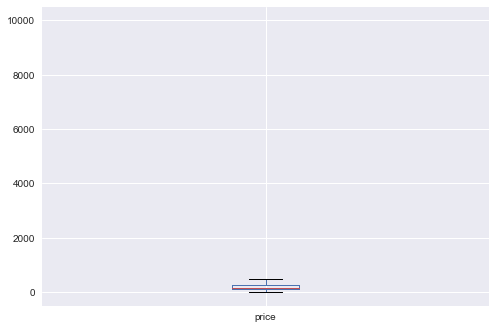

In [44]:
listing_data['price'].plot(kind='box')
plt.show()

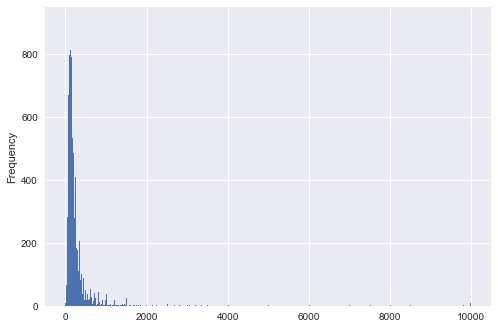

In [45]:
listing_data['price'].plot(kind='hist', bins=500)
plt.show()

In [61]:
listing_data[['id','summary','description','price']][listing_data['price']==0]

,id,summary,description,price
1928,10544305,asdfasdf,asdfasdf this is a test listing do not book no...,0.0


In [64]:
listing_data.drop(1928, inplace=True)

In [66]:
listing_data['price'].describe()

count     8705.000000
mean       250.189316
std        474.650313
min         10.000000
25%        100.000000
50%        160.000000
75%        250.000000
max      10000.000000
Name: price, dtype: float64

In [81]:
listing_data[['id','summary','description','price','street','room_type','number_of_reviews','availability_365']][listing_data['price']<=30]

,id,summary,description,price,street,room_type,number_of_reviews,availability_365
392,15852721,Our exceptional appartment perfectly located ...,Our exceptional appartment perfectly located ...,24.0,"Mission District, San Francisco, CA 94110, Uni...",Shared room,5,298
657,17237462,This is a nice little room in a four bedroom h...,This is a nice little room in a four bedroom h...,30.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,2,182
918,16792748,"Great Lone Mountain location, 2 blocks from US...","Great Lone Mountain location, 2 blocks from US...",10.0,"Richmond District, San Francisco, CA 94118, Un...",Private room,0,90
1588,17478285,Affordable Futon bed in SF in a peaceful neigh...,Affordable Futon bed in SF in a peaceful neigh...,30.0,"San Francisco, CA 94124, United States",Shared room,7,330
2275,11864708,This is a test listing to determine why the ad...,This is a test listing to determine why the ad...,10.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,0,0
3965,474001,Welcome to our home for budget-minded students...,Welcome to our home for budget-minded students...,29.0,"Chinatown, San Francisco, CA 94108, United States",Shared room,1,365
3980,8408841,Rich Silverstein is responsible for some of th...,Rich Silverstein is responsible for some of th...,22.0,"Chinatown, San Francisco, CA 94108, United States",Private room,0,0
3983,8408931,Comfy “Got Milk?” director's chair located in ...,Comfy “Got Milk?” director's chair located in ...,19.0,"Chinatown, San Francisco, CA 94108, United States",Private room,0,0
4005,206637,Welcome to our home for budget-minded students...,Welcome to our home for budget-minded students...,29.0,"Chinatown, San Francisco, CA 94108, United States",Shared room,2,306
4011,435390,My home is very communal. Students and interns...,My home is very communal. Students and interns...,29.0,"Chinatown, San Francisco, CA 94108, United States",Shared room,6,365


In [82]:
listing_data['room_type'].value_counts()

Entire home/apt    5083
Private room       3437
Shared room         185
Name: room_type, dtype: int64

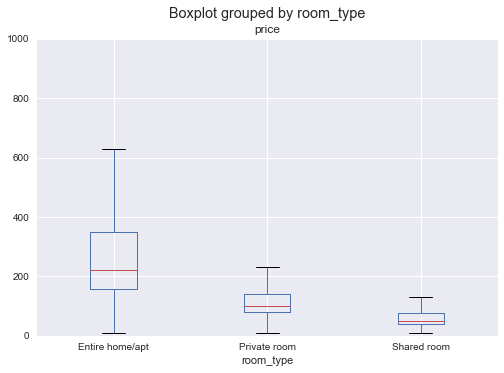

In [83]:
listing_data.boxplot(column='price', by='room_type')
plt.ylim(0,1000)
plt.show()

In [85]:
price_roomtype=listing_data.groupby('room_type')['price'].mean()
print(price_roomtype)

room_type
Entire home/apt    325.019477
Private room       142.640093
Shared room        192.270270
Name: price, dtype: float64


In [86]:
shared_room=listing_data[listing_data['room_type']=='Shared room']

In [88]:
shared_room['price'].describe()

count      185.000000
mean       192.270270
std       1042.911691
min         10.000000
25%         38.000000
50%         50.000000
75%         75.000000
max      10000.000000
Name: price, dtype: float64

In [90]:
# Dropping shared roomm listings
listing_data=listing_data[listing_data['room_type']!='Shared room']
listing_data.groupby('room_type')['price'].mean()

room_type
Entire home/apt    325.019477
Private room       142.640093
Name: price, dtype: float64

In [92]:
listing_data['price'].describe()

count     8520.000000
mean       251.446948
std        454.553358
min         10.000000
25%        105.000000
50%        165.000000
75%        259.250000
max      10000.000000
Name: price, dtype: float64

In [144]:
col_list=['id','listing_url','name','summary','description','price','street','room_type','number_of_reviews','availability_365']

In [126]:
listing_data[col_list][listing_data['price']==10]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
918,16792748,https://www.airbnb.com/rooms/16792748,Room across from Golden Gate Park,"Great Lone Mountain location, 2 blocks from US...","Great Lone Mountain location, 2 blocks from US...",10.0,"Richmond District, San Francisco, CA 94118, Un...",Private room,0,90
2275,11864708,https://www.airbnb.com/rooms/11864708,Annabel's House,This is a test listing to determine why the ad...,This is a test listing to determine why the ad...,10.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,0,0
6452,5403210,https://www.airbnb.com/rooms/5403210,"This is a test listing, don't book.",Hellohellohello,Hellohellohello,10.0,"Tenderloin, San Francisco, CA 94102, United St...",Entire home/apt,0,0
6684,12886996,https://www.airbnb.com/rooms/12886996,Test listing - 4,asdfasdfa,asdfasdfa,10.0,"Civic Center, San Francisco, CA 94102, United ...",Entire home/apt,0,0
7304,13624690,https://www.airbnb.com/rooms/13624690,TEST: DO NOT BOOK Noe Valley sunny studio,Super spacious studio with lots of sunshine on...,Super spacious studio with lots of sunshine on...,10.0,"Noe Valley, San Francisco, CA 94114, United St...",Entire home/apt,0,0


In [127]:
listing_data_copy=listing_data.copy

In [128]:
listing_data=listing_data[listing_data['price']!=10]

In [129]:
listing_data['price'].describe()

count     8515.000000
mean       251.588726
std        454.649139
min         19.000000
25%        105.000000
50%        165.000000
75%        260.000000
max      10000.000000
Name: price, dtype: float64

In [145]:
low_listing=listing_data[col_list][listing_data['price']<=50]
low_listing

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
0,10988680,https://www.airbnb.com/rooms/10988680,"Simple, new, clean accommodation",I signed a new lease and moving out of my plac...,I signed a new lease and moving out of my plac...,49.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,1,0
25,15501322,https://www.airbnb.com/rooms/15501322,Cozy and spacious room in a great location,Enjoy the heart of the Mission with great acce...,Enjoy the heart of the Mission with great acce...,45.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,0,0
36,16857004,https://www.airbnb.com/rooms/16857004,Private room in beautiful Mission apartment,I am off to Africa for a month of travel from ...,I am off to Africa for a month of travel from ...,40.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,0,0
143,2304925,https://www.airbnb.com/rooms/2304925,Private Room in the Mission District!,Located at the corner of 24th Street & Harriso...,Located at the corner of 24th Street & Harriso...,45.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,4,0
179,17682872,https://www.airbnb.com/rooms/17682872,~Spacious Single Room close to BART in Mission~,My place is close to 24th Street BART Station;...,My place is close to 24th Street BART Station;...,50.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,1,9
249,7873804,https://www.airbnb.com/rooms/7873804,San Francisco Mission-July 1 - 14-Entire Apart...,I'll be on vacation and want you to enjoy San ...,I'll be on vacation and want you to enjoy San ...,50.0,"Mission District, San Francisco, CA 94103, Uni...",Entire home/apt,3,14
286,9921369,https://www.airbnb.com/rooms/9921369,Cute in Mission Dist Victorian,Subletting my very cute bedroom in a four-bedr...,Subletting my very cute bedroom in a four-bedr...,49.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,19,0
355,9028989,https://www.airbnb.com/rooms/9028989,Cozy Queen Bed Mission District,Large private bedroom in the Mission with a gr...,Large private bedroom in the Mission with a gr...,45.0,"San Francisco, CA 94103, United States",Private room,1,0
416,9559555,https://www.airbnb.com/rooms/9559555,Sunny room in comfy house,This is a beautiful house in the heart of the ...,This is a beautiful house in the heart of the ...,45.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,1,0
657,17237462,https://www.airbnb.com/rooms/17237462,Bass Guitar Room,This is a nice little room in a four bedroom h...,This is a nice little room in a four bedroom h...,30.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,2,182


In [97]:
np.sum(listing_data['price']>=9000)

9

In [146]:
listing_data[col_list][listing_data['price']>=9000]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
1927,2417349,https://www.airbnb.com/rooms/2417349,NOT REAL,test,test,10000.0,"South Beach, San Francisco, CA 94105, United S...",Private room,0,365
1975,16769023,https://www.airbnb.com/rooms/16769023,listing,description,description,9809.0,"SoMa, San Francisco, CA 94103, United States",Private room,0,0
2091,15772967,https://www.airbnb.com/rooms/15772967,Nice place,testing,testing,9999.0,"San Francisco, CA 94103, United States",Entire home/apt,0,0
2136,13086674,https://www.airbnb.com/rooms/13086674,Centrally Located Private Room,This listing was posted due to a hacking on my...,This listing was posted due to a hacking on my...,10000.0,"San Francisco, CA 94103, United States",Entire home/apt,2,365
2280,10724176,https://www.airbnb.com/rooms/10724176,Super Bowl South Beach Loft,It is a very spacious place with a central roo...,It is a very spacious place with a central roo...,10000.0,"South Beach, San Francisco, CA 94107, United S...",Entire home/apt,0,0
2454,12756507,https://www.airbnb.com/rooms/12756507,test do not book,My place is close to Suppenküche and Sightglass.,My place is close to Suppenküche and Sightglass.,9996.0,"SoMa, San Francisco, CA 94103, United States",Private room,0,0
2718,17685675,https://www.airbnb.com/rooms/17685675,Large Private Bedroom with own bathroom,"- Large private bedroom, very large bathroom w...","- Large private bedroom, very large bathroom w...",10000.0,"Potrero Hill, San Francisco, CA 94107, United ...",Private room,0,0
3972,8614819,https://www.airbnb.com/rooms/8614819,test,test,test,10000.0,"Nob Hill, San Francisco, CA 94108, United States",Entire home/apt,0,0
4246,14893922,https://www.airbnb.com/rooms/14893922,Nob Hill Studio,我的房源靠近Ghirardelli Square、Gary Danko、Off the Gr...,我的房源靠近Ghirardelli Square、Gary Danko、Off the Gr...,9999.0,"Telegraph Hill, San Francisco, CA 94133, Unite...",Entire home/apt,0,83


In [137]:
np.sum((listing_data['price']>=2000) & (listing_data['price']<9000))

46

In [147]:
listing_data[col_list][(listing_data['price']>=2000) & (listing_data['price']<9000)]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
42,10947787,https://www.airbnb.com/rooms/10947787,Mission House w Roof Deck / Yard,Brand new home with huge kitchen / living room...,Brand new home with huge kitchen / living room...,2000.0,"Mission District, San Francisco, CA 94110, Uni...",Entire home/apt,0,0
66,1388523,https://www.airbnb.com/rooms/1388523,Mission Dolores Noe Valley Studio,Our studio apartment has been a great location...,Our studio apartment has been a great location...,4000.0,"Mission District, San Francisco, CA 94114, Uni...",Entire home/apt,40,362
730,8066789,https://www.airbnb.com/rooms/8066789,1Br-4Br/2Ba Apt in Heart of Mission,Newly renovated bedroom in 4 bd/2 ba Apt in he...,Newly renovated bedroom in 4 bd/2 ba Apt in he...,3200.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,2,0
1351,3925424,https://www.airbnb.com/rooms/3925424,4 Bedroom House w/ Backyard/Hot Tub,In the heart of the historic Union Street Area...,In the heart of the historic Union Street Area...,2200.0,"Cow Hollow, San Francisco, CA 94123, United St...",Entire home/apt,0,0
1447,13814017,https://www.airbnb.com/rooms/13814017,Marina luxury house near Palace of Fine Arts,"My place is close to Presidio, great restauran...","My place is close to Presidio, great restauran...",2100.0,"Marina, San Francisco, CA 94123, United States",Entire home/apt,0,0
1470,10879152,https://www.airbnb.com/rooms/10879152,High End Luxury Superbowl Apartment,Enjoy our luxury 3 Bed/2 bath apartment in San...,Enjoy our luxury 3 Bed/2 bath apartment in San...,2000.0,"San Francisco, CA, United States",Entire home/apt,0,0
1677,10926089,https://www.airbnb.com/rooms/10926089,LUX Pacific Height 4bed/2bath condo,"*Property sleeps up to 6 (one king bed, one qu...","*Property sleeps up to 6 (one king bed, one qu...",5000.0,"Pacific Heights, San Francisco, CA 94123, Unit...",Entire home/apt,0,0
1840,11064385,https://www.airbnb.com/rooms/11064385,Luxurious Pacific Heights Condo,Exclusive Condo with the best views in Pac Hei...,Exclusive Condo with the best views in Pac Hei...,3350.0,"Pacific Heights, San Francisco, CA 94115, Unit...",Entire home/apt,0,0
1899,10865972,https://www.airbnb.com/rooms/10865972,Luxury Superbowl House Rental,"A newly renovated, luxurious home centrally lo...","A newly renovated, luxurious home centrally lo...",3500.0,"Presidio Heights, San Francisco, CA 94118, Uni...",Entire home/apt,0,0
1909,9978975,https://www.airbnb.com/rooms/9978975,Gorgeous Single Family home,Central location in a high end neighborhood of...,Central location in a high end neighborhood of...,7000.0,"Presidio Heights, San Francisco, CA 94118, Uni...",Entire home/apt,0,0


In [149]:
listing_data[col_list][listing_data['name'].str.contains('Test')|listing_data['name'].str.contains('test')]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
326,13636515,https://www.airbnb.com/rooms/13636515,"Test!@#%^&*()-+'"";<img onerror=alert(1) src=","Test!@#%^&*()-+'"";<img onerror=alert(1) src=","Test!@#%^&*()-+'"";<img onerror=alert(1) src=",66.0,"Potrero Hill, San Francisco, CA 94103, United ...",Private room,0,0
1924,17993344,https://www.airbnb.com/rooms/17993344,do not book - test,test do not book,test do not book,200.0,"SoMa, San Francisco, CA 94103, United States",Private room,0,365
2142,7697664,https://www.airbnb.com/rooms/7697664,Test - Complex SF,SF test.,SF test.,100.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,0,0
2454,12756507,https://www.airbnb.com/rooms/12756507,test do not book,My place is close to Suppenküche and Sightglass.,My place is close to Suppenküche and Sightglass.,9996.0,"SoMa, San Francisco, CA 94103, United States",Private room,0,0
3157,723583,https://www.airbnb.com/rooms/723583,Test: Bedroom in Duboce,NaN,Test test test test test,999.0,"Duboce Triangle, San Francisco, CA 94114, Unit...",Private room,0,365
3174,1614129,https://www.airbnb.com/rooms/1614129,Castro's Sweetest Spot,"Conveniently located near parks, cafes, muni, ...","Conveniently located near parks, cafes, muni, ...",110.0,"Duboce Triangle, San Francisco, CA 94114, Unit...",Private room,10,317
3458,16288266,https://www.airbnb.com/rooms/16288266,Test,Test,Test,56.0,"Twin Peaks, San Francisco, CA 94131, United St...",Private room,0,0
3972,8614819,https://www.airbnb.com/rooms/8614819,test,test,test,10000.0,"Nob Hill, San Francisco, CA 94108, United States",Entire home/apt,0,0
6415,10702945,https://www.airbnb.com/rooms/10702945,Test Room for Rent,Great room,Great room,120.0,"Civic Center, San Francisco, CA 94102, United ...",Private room,0,0
7105,8646447,https://www.airbnb.com/rooms/8646447,Test1,colorful room for cheap.,colorful room for cheap.,100.0,"Noe Valley, San Francisco, CA 94401, United St...",Private room,0,0


In [152]:
listing_data[col_list][(listing_data['number_of_reviews']==0) & (listing_data['availability_365']==0)&(listing_data['availability_90']==0)]

,id,listing_url,name,summary,description,price,street,room_type,number_of_reviews,availability_365
4,9080622,https://www.airbnb.com/rooms/9080622,Edwardian flat in heart of Mission,Bedroom with queen bed available. The condo i...,Bedroom with queen bed available. The condo i...,200.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,0,0
8,12815115,https://www.airbnb.com/rooms/12815115,Spacious Mission Condo,"Built in 2014, this modern penthouse's 3 porch...","Built in 2014, this modern penthouse's 3 porch...",600.0,"Mission District, San Francisco, CA 94110, Uni...",Entire home/apt,0,0
13,15151013,https://www.airbnb.com/rooms/15151013,"Live/Work Tech Space #1 - Mission, SF","My place is in the heart of Mission, close to ...","My place is in the heart of Mission, close to ...",90.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,0,0
21,10756717,https://www.airbnb.com/rooms/10756717,"Bright, spacious Mission flat",Flat is open and spacious and has a lot of nat...,Flat is open and spacious and has a lot of nat...,550.0,"Mission District, San Francisco, CA 94110, Uni...",Entire home/apt,0,0
25,15501322,https://www.airbnb.com/rooms/15501322,Cozy and spacious room in a great location,Enjoy the heart of the Mission with great acce...,Enjoy the heart of the Mission with great acce...,45.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,0,0
36,16857004,https://www.airbnb.com/rooms/16857004,Private room in beautiful Mission apartment,I am off to Africa for a month of travel from ...,I am off to Africa for a month of travel from ...,40.0,"Mission District, San Francisco, CA 94110, Uni...",Private room,0,0
37,11011745,https://www.airbnb.com/rooms/11011745,Superbowl Apt. near Frway and Bart!,"Located in the Mission District of SF, this 3 ...","Located in the Mission District of SF, this 3 ...",500.0,"Mission District, San Francisco, CA 94110, Uni...",Entire home/apt,0,0
42,10947787,https://www.airbnb.com/rooms/10947787,Mission House w Roof Deck / Yard,Brand new home with huge kitchen / living room...,Brand new home with huge kitchen / living room...,2000.0,"Mission District, San Francisco, CA 94110, Uni...",Entire home/apt,0,0
64,10809367,https://www.airbnb.com/rooms/10809367,Nice Mission Apartment Walk to BART,Sleep in a cozy queen bed on a quiet street th...,Sleep in a cozy queen bed on a quiet street th...,350.0,"Mission District, San Francisco, CA 94110, Uni...",Entire home/apt,0,0
85,6336315,https://www.airbnb.com/rooms/6336315,Edwardian Condo Centrally Located,This is a recently renovated 1 bedroom condomi...,This is a recently renovated 1 bedroom condomi...,240.0,"SoMa, San Francisco, CA 94103, United States",Entire home/apt,0,0


In [96]:
listing_data['neighbourhood_cleansed'].value_counts()

Mission                  1012
Western Addition          766
South of Market           587
Downtown/Civic Center     551
Castro/Upper Market       478
Bernal Heights            451
Haight Ashbury            411
Noe Valley                390
Nob Hill                  317
Marina                    304
Potrero Hill              284
Inner Richmond            282
Outer Sunset              247
Pacific Heights           240
Russian Hill              223
Outer Richmond            192
Inner Sunset              167
North Beach               164
Outer Mission             163
Excelsior                 151
Chinatown                 141
West of Twin Peaks        123
Financial District        121
Bayview                   116
Parkside                  115
Ocean View                107
Twin Peaks                100
Glen Park                  82
Lakeshore                  50
Presidio Heights           39
Visitacion Valley          34
Crocker Amazon             28
Treasure Island/YBI        25
Seacliff  

In [38]:
price_neighhourhood=listing_data.groupby('neighbourhood_cleansed')['price'].mean()
print(price_neighhourhood)

neighbourhood_cleansed
Bayview                  125.703390
Bernal Heights           201.075388
Castro/Upper Market      249.518750
Chinatown                277.407895
Crocker Amazon           115.142857
Diamond Heights          199.590909
Downtown/Civic Center    210.152482
Excelsior                144.091503
Financial District       271.478571
Glen Park                231.829268
Golden Gate Park         235.875000
Haight Ashbury           235.553140
Inner Richmond           230.292683
Inner Sunset             255.047059
Lakeshore                164.942308
Marina                   320.950980
Mission                  212.025097
Nob Hill                 239.506211
Noe Valley               270.633333
North Beach              321.755556
Ocean View               147.693694
Outer Mission            182.689024
Outer Richmond           203.553846
Outer Sunset             164.519685
Pacific Heights          331.098765
Parkside                 229.983471
Potrero Hill             326.080420
Presi

In [33]:
import requests
url = 'http://api.walkscore.com/score?format=json&address=San%Francisco%20CA%94110&lat=37.754184&lon=-122.406514&transit=1&bike=1&wsapikey=ffd1c56f9abcf84872116b4cc2dfcf31'
r=requests.get(url)
json_data=r.json()

In [34]:
for k in json_data.keys():
    print(k + ': ', json_data[k])

status:  1
walkscore:  93
description:  Walker's Paradise
updated:  2017-05-11 17:38:58.535560
logo_url:  https://cdn.walk.sc/images/api-logo.png
more_info_icon:  https://cdn.walk.sc/images/api-more-info.gif
more_info_link:  https://www.redfin.com/how-walk-score-works
ws_link:  https://www.walkscore.com/score/San-Francisco-20CA-94110/lat=37.754184/lng=-122.406514/?utm_source=gmail.com&utm_medium=ws_api&utm_campaign=ws_api
help_link:  https://www.redfin.com/how-walk-score-works
snapped_lat:  37.7535
snapped_lon:  -122.406
transit:  {'score': 76, 'description': 'Excellent Transit', 'summary': '27 nearby routes: 19 bus, 8 rail, 0 other'}
bike:  {'score': 99, 'description': "Biker's Paradise"}


In [35]:
address=listing_data[['street','city','state','zipcode','country','latitude','longitude','is_location_exact']]
address.head()

,street,city,state,zipcode,country,latitude,longitude,is_location_exact
0,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.754184,-122.406514,t
1,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.754166,-122.421534,t
2,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.758506,-122.406152,t
3,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.756549,-122.422025,t
4,"Mission District, San Francisco, CA 94110, Uni...",San Francisco,CA,94110,United States,37.760051,-122.421352,t


In [36]:
walkscore=pd.DataFrame(json_data)

In [37]:
walkscore.head()

,bike,description,help_link,logo_url,more_info_icon,more_info_link,snapped_lat,snapped_lon,status,transit,updated,walkscore,ws_link
description,Biker's Paradise,Walker's Paradise,https://www.redfin.com/how-walk-score-works,https://cdn.walk.sc/images/api-logo.png,https://cdn.walk.sc/images/api-more-info.gif,https://www.redfin.com/how-walk-score-works,37.7535,-122.406,1,Excellent Transit,2017-05-11 17:38:58.535560,93,https://www.walkscore.com/score/San-Francisco-...
score,99,Walker's Paradise,https://www.redfin.com/how-walk-score-works,https://cdn.walk.sc/images/api-logo.png,https://cdn.walk.sc/images/api-more-info.gif,https://www.redfin.com/how-walk-score-works,37.7535,-122.406,1,76,2017-05-11 17:38:58.535560,93,https://www.walkscore.com/score/San-Francisco-...
summary,NaN,Walker's Paradise,https://www.redfin.com/how-walk-score-works,https://cdn.walk.sc/images/api-logo.png,https://cdn.walk.sc/images/api-more-info.gif,https://www.redfin.com/how-walk-score-works,37.7535,-122.406,1,"27 nearby routes: 19 bus, 8 rail, 0 other",2017-05-11 17:38:58.535560,93,https://www.walkscore.com/score/San-Francisco-...
